In [6]:
from Code.Outils import *
from Code.Metriques import *
from kmodes.kmodes import KModes
from random import *
from statistics import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Extractions des données

In [7]:
Df = pd.read_csv("Code/Données/bank.csv",sep=";")

#### Tri des valeurs à garder

In [8]:
Df = Df[['age','job', 'marital', 'education', 'default', 'housing', 
'loan','contact','month','poutcome']]

In [9]:
Df.head()

,age,job,marital,education,default,housing,loan,contact,month,poutcome
0,30,unemployed,married,primary,no,no,no,cellular,oct,unknown
1,33,services,married,secondary,no,yes,yes,cellular,may,failure
2,35,management,single,tertiary,no,yes,no,cellular,apr,failure
3,30,management,married,tertiary,no,yes,yes,unknown,jun,unknown
4,59,blue-collar,married,secondary,no,yes,no,unknown,may,unknown


## Fonction KModes

In [10]:
def k_modes(K,data,max_iter):
    
    #Initialisation des centres choisis aléatoirement
    centers= k_modes_center(K,data)
    not_same_as_before = True
    i=0
    IVC = []
    
    while (not_same_as_before and i!=max_iter):
        
        label = []
        i+=1
        # Remise à zéro de clusters
        cluster = dict((i,pd.DataFrame(columns=data.columns)) for i in range(K))
        
        for d in range(data.shape[0]):
            
            minimum_center = min([(dissimilarity(centers.iloc[i],data.iloc[d]),i) for i in range(K)])
            
            cluster[minimum_center[1]].loc[len(cluster[minimum_center[1]])] = data.iloc[d]
            label.append(minimum_center[1])
            
        # Recalcule les centres
        new_center = pd.concat([new_centroid_KMode(cluster[i]) for i in range(K)],ignore_index=True)
        IVC.append(IVC_KModes(centers,cluster))
        
        # On regarde si les centres sont toujours les mêmes
        if (new_center.equals(centers)): 
            not_same_as_before = False
        else:
            centers=new_center
    
    return (centers,cluster,label,IVC)

In [11]:
def silhouette(cluster,label,distance):
    s = 0
    for c in range(len(cluster)):
        sc = 0
        for i in cluster[c]:
            sp = 0
            ai = sum([distance(i,cluster[c][a]) for a in range(len(cluster[c]))])/(len(cluster[c])-1)
            for oc in range(len(cluster)):
                bi = float('inf')
                if c!=oc :
                    bi_c = sum([distance(i,cluster[oc][b]) for b in range(len(cluster[oc]))])/len(cluster) 
                    if (bi_c<bi):
                        bi = bi_c
            sp = sp + (bi-ai)/max(ai,bi)
        s = s + sp/len(cluster[c])
    return s/len(cluster)              

In [ ]:
center,cluster,label,_ =  k_modes(3,Df,100)

## Utilisation 

### Bank Data

Fonction marche qd elle est codée ici mais pas quand on l'importe

In [12]:
def IVC_KModes(centroid,cluster):
    """
    Calcul l'intra-cluster-variance
    """
    res = 0
    for i in range(len(centroid)):
        for j in range(len(cluster[i])) :
            res += dissimilarity(cluster[i].loc[j],centroid.iloc[i])**2
    return res

In [13]:
centers2, cluster2, label2,Y = k_modes(2,Df,15)

Text(0, 0.5, 'IVC')

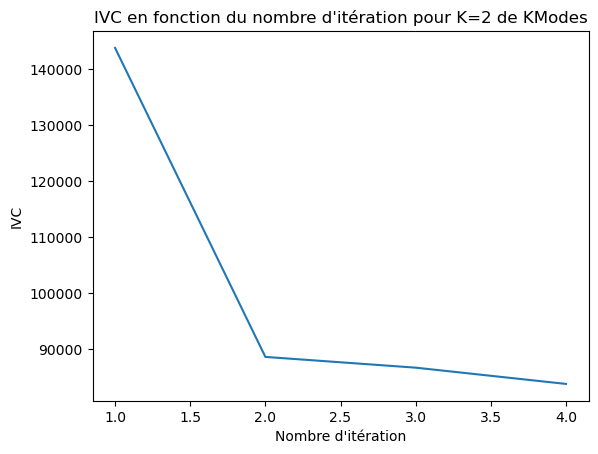

In [14]:
plt.plot([i for i in range(1,len(Y)+1)],Y)
plt.title("IVC en fonction du nombre d'itération pour K=2 de KModes")
plt.xlabel("Nombre d'itération")
plt.ylabel("IVC")

In [15]:
centers3, cluster3, label3,Y = k_modes(3,Df,15)

Text(0, 0.5, 'IVC')

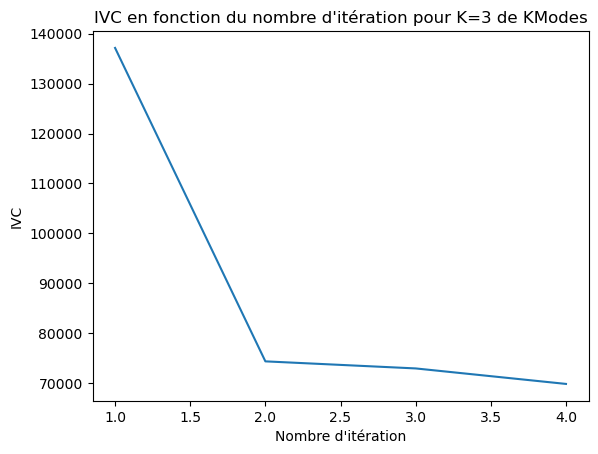

In [16]:
plt.plot([i for i in range(1,len(Y)+1)],Y)
plt.title("IVC en fonction du nombre d'itération pour K=3 de KModes")
plt.xlabel("Nombre d'itération")
plt.ylabel("IVC")

### Application avec une autre fonction KModes

Lien de la fonction utilisée : 
https://github.com/nicodv/kmodes/tree/master#huang97

### Comparaisons des données

In [17]:
rd = []
acc = []
for exp in range(10):
    print(exp)
    seed(exp)
    km = KModes(n_clusters =3,n_init=10)
    clusters = km.fit_predict(Df)
    _,_,label,_ = k_modes(3,Df,10)
    acc.append(Accuracy(km.labels_,label))
    rd.append(rand_index(km.labels_,label))

0
1
2
3
4
5
6
7
8
9


In [18]:
mean(rd),pstdev(rd)

(0.7019885568428944, 0.0)

In [19]:
mean(acc),pstdev(acc)

(0.6606945366069453, 0.0)

### Vote

In [20]:
Df = pd.read_csv("Code/Données/house-votes-84.csv",sep=";")

In [21]:
rd = []
acc = []
for exp in range(1,10):
    print(exp)
    km = KModes(n_clusters =exp,n_init=10)
    clusters = km.fit_predict(Df)
    _,_,label,_ = k_modes(exp,Df,10)
    acc.append(Accuracy(km.labels_,label))
    rd.append(rand_index(km.labels_,label))

1
2
3
4
5
6
7
8
9


In [22]:
mean(acc),pstdev(acc)

(0.9764464925755248, 0.017741030352350636)

In [23]:
mean(rd),pstdev(rd)

(0.9754295221776411, 0.022217667500584425)

In [24]:
Y = []
for k in range(1,10):
    _,_,_,X = k_modes(k,Df,15)
    Y.append(X[-1])

Text(0, 0.5, 'IVC')

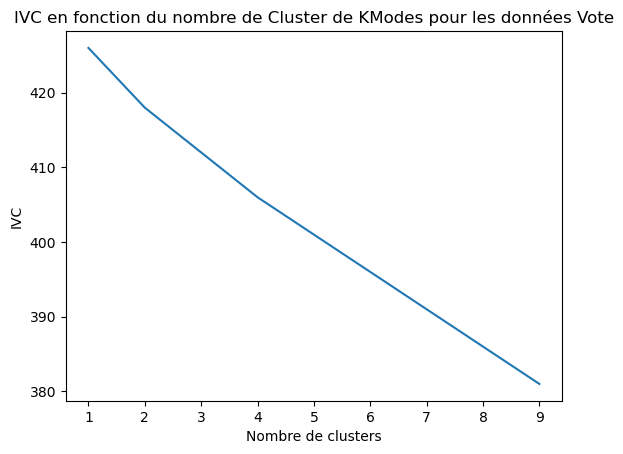

In [25]:
plt.plot([i for i in range(1,len(Y)+1)],Y)
plt.title("IVC en fonction du nombre de Cluster de KModes pour les données Vote")
plt.xlabel("Nombre de clusters")
plt.ylabel("IVC")

### Credit Approval

In [26]:
Df = pd.read_csv("Code/Données/credit-approval.csv",sep=";")

In [27]:
rd = []
acc = []
for exp in range(1,10):
    print(exp)
    km = KModes(n_clusters =exp,n_init=10)
    clusters = km.fit_predict(Df)
    _,_,label,_ = k_modes(exp,Df,10)
    acc.append(Accuracy(km.labels_,label))
    rd.append(rand_index(km.labels_,label))

1
2
3
4
5
6
7
8
9


In [28]:
mean(acc),pstdev(acc)

(0.9884057971014493, 0.007484025789772791)

In [29]:
mean(rd),pstdev(rd)

(0.9770808354893671, 0.014718407157895864)

In [30]:
Y = []
for k in range(1,10):
    _,_,_,X = k_modes(k,Df,15)
    Y.append(X[-1])

Text(0, 0.5, 'IVC')

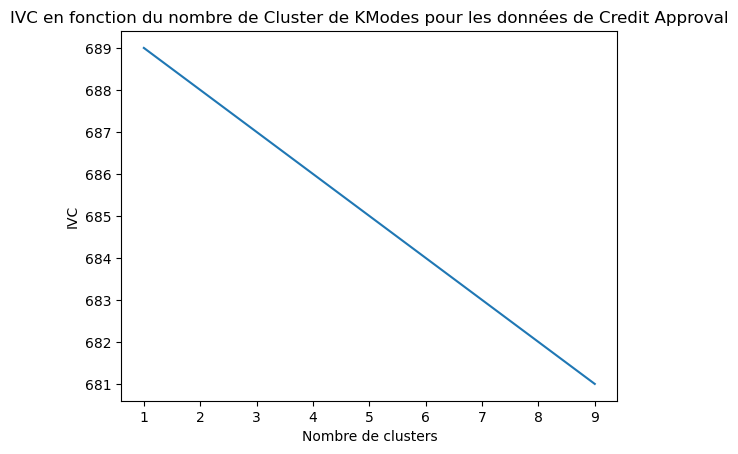

In [31]:
plt.plot([i for i in range(1,len(Y)+1)],Y)
plt.title("IVC en fonction du nombre de Cluster de KModes pour les données de Credit Approval")
plt.xlabel("Nombre de clusters")
plt.ylabel("IVC")